In [4]:
import numpy as np
import pandas as pd
import gensim
import nltk
import re
import string

In [2]:
raw_data = pd.read_csv(r'D:\LinkedIn Learning\NLP\Ex_Files_NLP_Python_ML_EssT\Exercise Files\Ch02\02_04\Start\SMSSpamCollection.tsv',delimiter = '\t',names=['label','text'])
raw_data.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [54]:
wn=nltk.WordNetLemmatizer() 
def clean_text(text):
    text = re.sub('\d+',"",text)
    text = "".join([char for char in text if char not in string.punctuation])
    token = re.split('\W+',text)
    text = [wn.lemmatize(word) for word in token if word not in nltk.corpus.stopwords.words('english')]
    return text

raw_data['cleaned_text'] = raw_data['text'].apply(lambda x: clean_text(x.lower()))
raw_data

,label,text,cleaned_text,punct%
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, word, thank, breather,...",2.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",3.9
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",3.3
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",5.7
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,...",5.0
5564,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",2.8
5565,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestion]",12.3
5566,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",0.8


In [55]:
raw_data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [56]:
def punct(text):
    punct=sum([1 for word in text if word in string.punctuation])
    return round(punct/len(text),3)*100

raw_data['punct%'] = raw_data['text'].apply(lambda x: punct(x))
raw_data

,label,text,cleaned_text,punct%
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, word, thank, breather,...",2.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",3.9
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",3.3
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",5.7
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,...",5.0
5564,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",2.8
5565,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestion]",12.3
5566,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",0.8


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='punct%'>

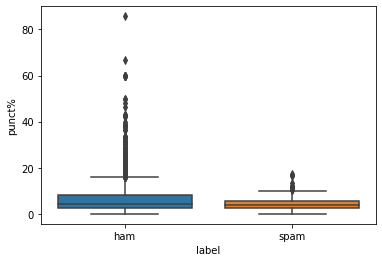

In [58]:
sns.boxplot(raw_data['label'],raw_data['punct%'])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
X_train, X_test, y_train, y_test = train_test_split(raw_data['text'],raw_data['label'],test_size=0.2)

In [90]:
tf= TfidfVectorizer(analyzer = clean_text)

In [91]:
tf.fit(X_train)
tf_X_train = tf.transform(X_train)
tf_X_test = tf.transform(X_test)

In [92]:
tf_X_train

<4454x8982 sparse matrix of type '<class 'numpy.float64'>'
	with 43157 stored elements in Compressed Sparse Row format>

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier(n_jobs=-1,criterion='entropy')
model = rfc.fit(tf_X_train.toarray(),y_train)
y_pred = rfc.predict(tf_X_test.toarray())

In [102]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [103]:
 pd.DataFrame(tf_X_train.toarray())

,0,1,2,3,4,5,6,7,8,9,...,8972,8973,8974,8975,8976,8977,8978,8979,8980,8981
0,0.271356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.134418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.177243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229322,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4450,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4451,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       959
        spam       0.99      0.81      0.89       155

    accuracy                           0.97      1114
   macro avg       0.98      0.91      0.94      1114
weighted avg       0.97      0.97      0.97      1114



# Using Naive Bayes

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
NB = MultinomialNB(alpha=1)
model2 = NB.fit(tf_X_train.toarray(),y_train)
y_pred2 = NB.predict(tf_X_test.toarray())

In [115]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       959
        spam       0.99      0.69      0.81       155

    accuracy                           0.96      1114
   macro avg       0.97      0.84      0.89      1114
weighted avg       0.96      0.96      0.95      1114

